### Домашнее задание
При фиксированном seed=21  поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, 
tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции Растригина от значения параметра.

f(x) = An + E[x^2 - A cos(2px)],
  где A = 10 , x E[-5.12, 5.12].  Глобальный минимум в точке x = 0, where f(x) = 0
  
result = differential_evolution(rastrigin, bounds, seed = 21)

In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

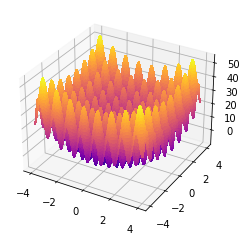

In [11]:
if __name__ == '__main__':
    X = np.linspace(-4, 4, 200)    
    Y = np.linspace(-4, 4, 200)
    X, Y = np.meshgrid(X, Y)

    Z = rastrigin(X, Y, A=10)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)


In [12]:
from scipy.optimize import dual_annealing

In [29]:
bounds = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]
rastrig = lambda x: np.sum(x*x - 10*np.cos(2*np.pi*x)) + 10*np.size(x)


In [30]:
lw = [-5.12] * 10
up = [5.12] * 10
ret = dual_annealing(rastrig, bounds=list(zip(lw, up)), seed=21)
ret.x

array([-6.55774405e-10, -7.84634665e-10, -6.21592078e-09, -5.01388479e-09,
       -3.94946307e-09, -4.86738555e-09, -1.57570064e-10, -1.61449803e-11,
       -6.42140318e-09, -6.35212717e-09])

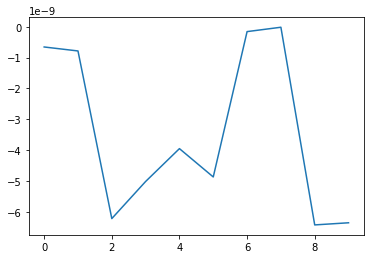

In [59]:
plt.plot(ret.x)  # Функция Растригина

In [31]:
from scipy.optimize import differential_evolution


import numpy as np
def rastrigin(*X, **kwargs):
    A = kwargs.get('A', 10)
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])


bounds = [(-5, 5), (-5, 5)]

result = differential_evolution(rastrig, bounds, seed=21, recombination=0.7, tol=0.1)

result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 68
 success: True
       x: array([-2.47499521e-09, -6.55134280e-10])

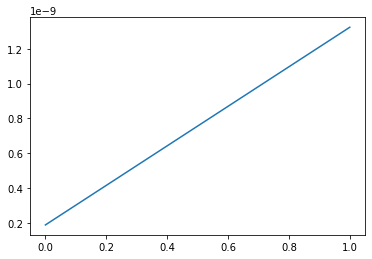

In [46]:
plt.plot(result.x)

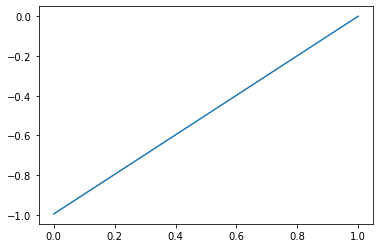

In [61]:
result1 = differential_evolution(rastrig, bounds, popsize=0.7, tol=0.1)

plt.plot(result1.x)

In [68]:
ret2 = dual_annealing(rastrig, bounds=list(zip(lw, up)), seed=21, maxiter=100)
ret2

     fun: 3.979836228373216
 message: ['Maximum number of iteration reached']
    nfev: 2771
    nhev: 0
     nit: 100
    njev: 70
  status: 0
 success: True
       x: array([-5.27076723e-09,  9.94958635e-01, -9.94958643e-01, -5.01388479e-09,
       -4.79072331e-09, -9.94958642e-01, -3.91731683e-09, -6.53437777e-09,
        9.94958635e-01, -5.80838793e-09])

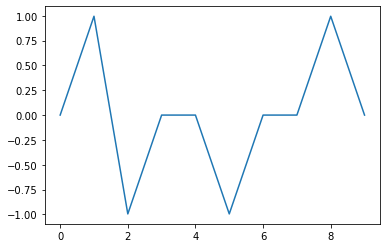

In [67]:
plt.plot(ret2.x)

In [70]:
ret3 = dual_annealing(rastrig, bounds=list(zip(lw, up)), maxfun=0.98)
ret3

     fun: 133.21996158015784
 message: ['Maximum number of function call reached during annealing']
    nfev: 2
    nhev: 0
     nit: 0
    njev: 0
  status: 0
 success: False
       x: array([ 4.30035062, -0.86096138,  3.15115484, -0.86821446,  3.45391406,
       -0.82099306, -0.84034902,  3.78964351, -0.84641286, -3.00929087])

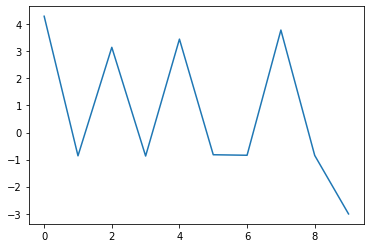

In [72]:
plt.plot(ret3.x)

In [88]:
ret4 = dual_annealing(rastrig, bounds=list(zip(lw, up)), no_local_search=True)
ret4

     fun: 0.00011310210081205696
 message: ['Maximum number of iteration reached']
    nfev: 20001
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-3.62968398e-04, -2.53218534e-04,  1.69981590e-05,  2.36463559e-04,
       -2.93044681e-04, -1.95494448e-04, -2.20761129e-04,  1.54754805e-04,
       -1.43219645e-04, -3.17387253e-04])

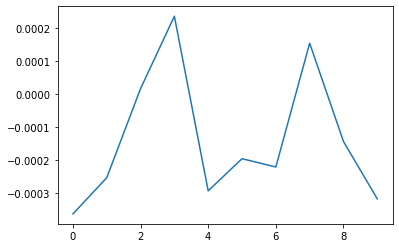

In [89]:
plt.plot(ret4.x)

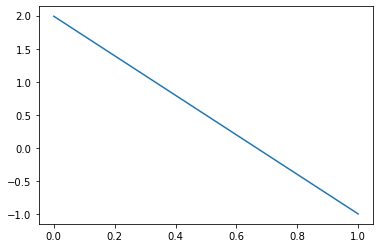

In [51]:
result2 = differential_evolution(rastrig, bounds, seed=21, popsize=0.7, mutation=[0.1, 1.95])

plt.plot(result2.x)

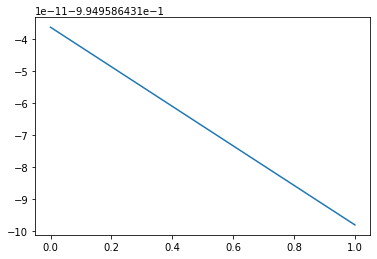

In [53]:
result3 = differential_evolution(rastrig, bounds, seed=21, popsize=0.7, updating='deferred')

plt.plot(result3.x)

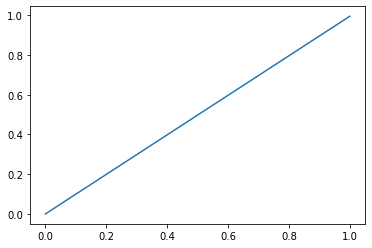

In [55]:
result4 = differential_evolution(rastrig, bounds, seed=21, popsize=0.2, updating='immediate')

plt.plot(result4.x)

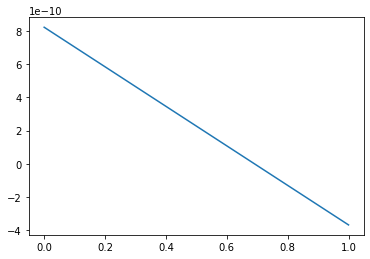

In [57]:
result5 = differential_evolution(rastrig, bounds, recombination=0.85, updating='deferred')

plt.plot(result5.x)